<a href="https://colab.research.google.com/github/Premjit1/facial-expression-emotion-streamlt/blob/main/facial_image_recognition_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/fer2013.csv'

details of the data set EDA

In [ ]:
#details of the data set EDA analysis
train = pd.read_csv(path)

In [ ]:
train.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
emotion_prop = (train.emotion.value_counts() / len(train)).to_frame().sort_index(ascending=True)

emotion_prop

,emotion
0,0.138017
1,0.015242
2,0.142698
3,0.250481
4,0.169337
5,0.111517
6,0.172709


In [ ]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

GRAPHICAL ANALYSIS

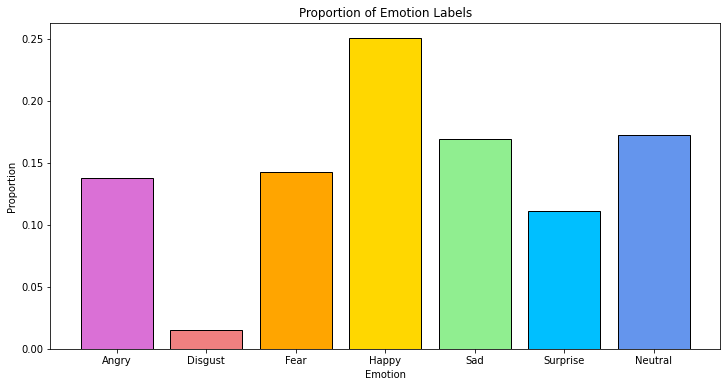

In [ ]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

plt.figure(figsize=[12,6])

plt.bar(x=emotions, height=emotion_prop['emotion'], color=palette, edgecolor='black')
    
plt.xlabel('Emotion')
plt.ylabel('Proportion')
plt.title('Proportion of Emotion Labels')
plt.show()

In [ ]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    return image

In [ ]:
train['pixels'] = train['pixels'].apply(pixels_to_array)
X = image_reshape(train)
y = train['emotion']

TRAINING THE DATA FOR MODELLING

In [ ]:
#TRAINING THE DATA FOR MODELLING
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(28709, 48, 48, 1)
(28709,)
(7178, 48, 48, 1)
(7178,)


TRAINING THE CNN MODEL

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

cnn = Sequential([
    Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape=(48,48,1)),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [ ]:
opt = tf.keras.optimizers.Adam(0.001)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
%%time 

h1 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 10,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

Epoch 1/10
113/113 [==============================] - 936s 8s/step - loss: 2.1713 - accuracy: 0.1845 - val_loss: 3.9908 - val_accuracy: 0.1779
Epoch 2/10
113/113 [==============================] - 936s 8s/step - loss: 1.9135 - accuracy: 0.2381 - val_loss: 1.7593 - val_accuracy: 0.2899
Epoch 3/10
113/113 [==============================] - 934s 8s/step - loss: 1.8355 - accuracy: 0.2582 - val_loss: 1.7765 - val_accuracy: 0.2668
Epoch 4/10
113/113 [==============================] - 941s 8s/step - loss: 1.7360 - accuracy: 0.3131 - val_loss: 1.7804 - val_accuracy: 0.3151
Epoch 5/10
113/113 [==============================] - 947s 8s/step - loss: 1.5787 - accuracy: 0.3850 - val_loss: 1.5565 - val_accuracy: 0.4037
Epoch 6/10
113/113 [==============================] - 935s 8s/step - loss: 1.4749 - accuracy: 0.4329 - val_loss: 1.4406 - val_accuracy: 0.4452
Epoch 7/10
113/113 [==============================] - 939s 8s/step - loss: 1.4098 - accuracy: 0.4544 - val_loss: 1.4635 - val_accuracy: 0.4397

In [ ]:
history = h1.history
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


GRAPHICAL MODEL SUMMARY

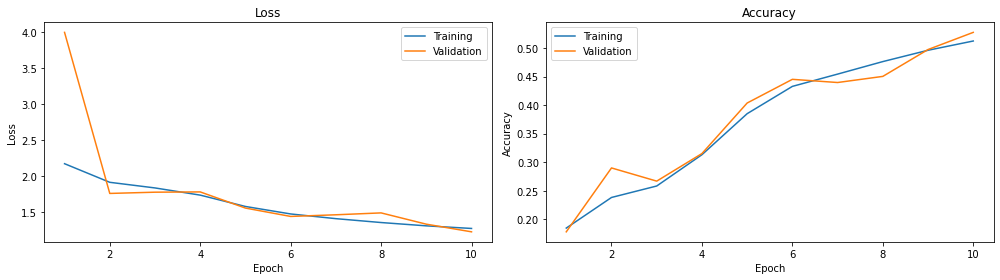

In [ ]:
#GRAPHICAL MODEL SUMMARY
epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
tf.keras.backend.set_value(cnn.optimizer.learning_rate, 0.0001)

In [ ]:
%%time 

h2 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 8,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

Epoch 1/8
113/113 [==============================] - 950s 8s/step - loss: 1.2377 - accuracy: 0.5283 - val_loss: 1.1804 - val_accuracy: 0.5500
Epoch 2/8
113/113 [==============================] - 949s 8s/step - loss: 1.2174 - accuracy: 0.5371 - val_loss: 1.1711 - val_accuracy: 0.5524
Epoch 3/8
113/113 [==============================] - 950s 8s/step - loss: 1.2094 - accuracy: 0.5395 - val_loss: 1.1573 - val_accuracy: 0.5591
Epoch 4/8
113/113 [==============================] - 955s 8s/step - loss: 1.2048 - accuracy: 0.5415 - val_loss: 1.1570 - val_accuracy: 0.5603
Epoch 5/8
113/113 [==============================] - 950s 8s/step - loss: 1.1951 - accuracy: 0.5451 - val_loss: 1.1506 - val_accuracy: 0.5612
Epoch 6/8
113/113 [==============================] - 955s 8s/step - loss: 1.1893 - accuracy: 0.5461 - val_loss: 1.1498 - val_accuracy: 0.5591
Epoch 7/8
113/113 [==============================] - 956s 8s/step - loss: 1.1830 - accuracy: 0.5524 - val_loss: 1.1524 - val_accuracy: 0.5616
Epoch 

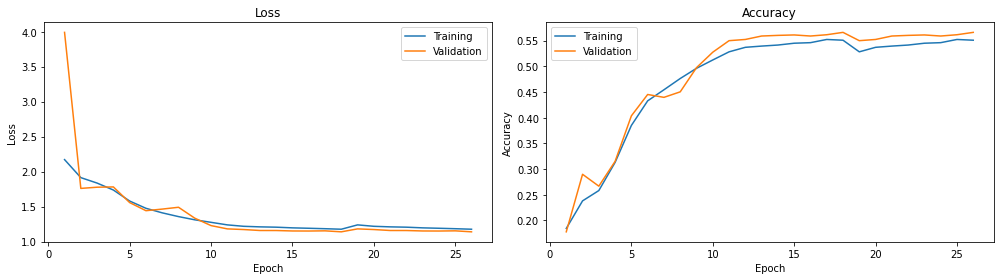

In [ ]:
for k in history.keys():
    history[k] += h2.history[k]
    epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
cnn.save('fer_model_v01.h5')
pickle.dump(history, open(f'fer_v01.pkl', 'wb'))

MODEL TESTING

In [ ]:
#MODEL TESTING
print(X_train[0].shape)
print(type(y_train),type(X_train[0]))#,y_train[0])
temp = cnn.predict(X_train[0].reshape((1,48,48,1)))
print(temp)
temp1 = cnn.predict(X_train[1].reshape((1,48,48,1)))
print(temp1)
#print(temp[0].index(max(temp[0])))
#plt.imshow(X[0],cmap="gray")


(48, 48, 1)
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
[[0.3113414  0.03859478 0.1627047  0.02450146 0.3756231  0.00899008
  0.0782444 ]]
[[0.09273748 0.00829807 0.08326686 0.18860614 0.27781653 0.01323585
  0.33603904]]


TRAIN AND TEST

TESTING ACCURACY

In [ ]:
#ACCURACY TESTING
test_prob = cnn.predict(X_valid)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == y_valid)

print(test_accuracy)

0.5661744218445249


In [ ]:
test_prob1 = cnn.predict(X_train)
test_pred1 = np.argmax(test_prob1, axis=1)
test_accuracy1 = np.mean(test_pred1 == y_train)

print(test_accuracy1)

0.5922533003587725


In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'D:\dp\pr\haarcascade_frontalface_default.xml')
classifier =load_model(r'D:\dp\pr\Emotion_little_vgg.h5')

class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

cap = cv2.VideoCapture(0)



while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    # rect,face,image = face_detector(frame)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


STREAMLIT TESTING FOR LIVE WEB CAM

In [ ]:
%%writefile app5.py

from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'C:\Users\soupau\haarcascade_frontalface_default.xml')
classifier =load_model(r'C:\Users\soupau\Emotion_little_vgg.h5')

class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

cap = cv2.VideoCapture("C:/Users/soupau/Videos/facial_exp.mkv")



while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    # rect,face,image = face_detector(frame)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Writing app5.py


OUTPUT

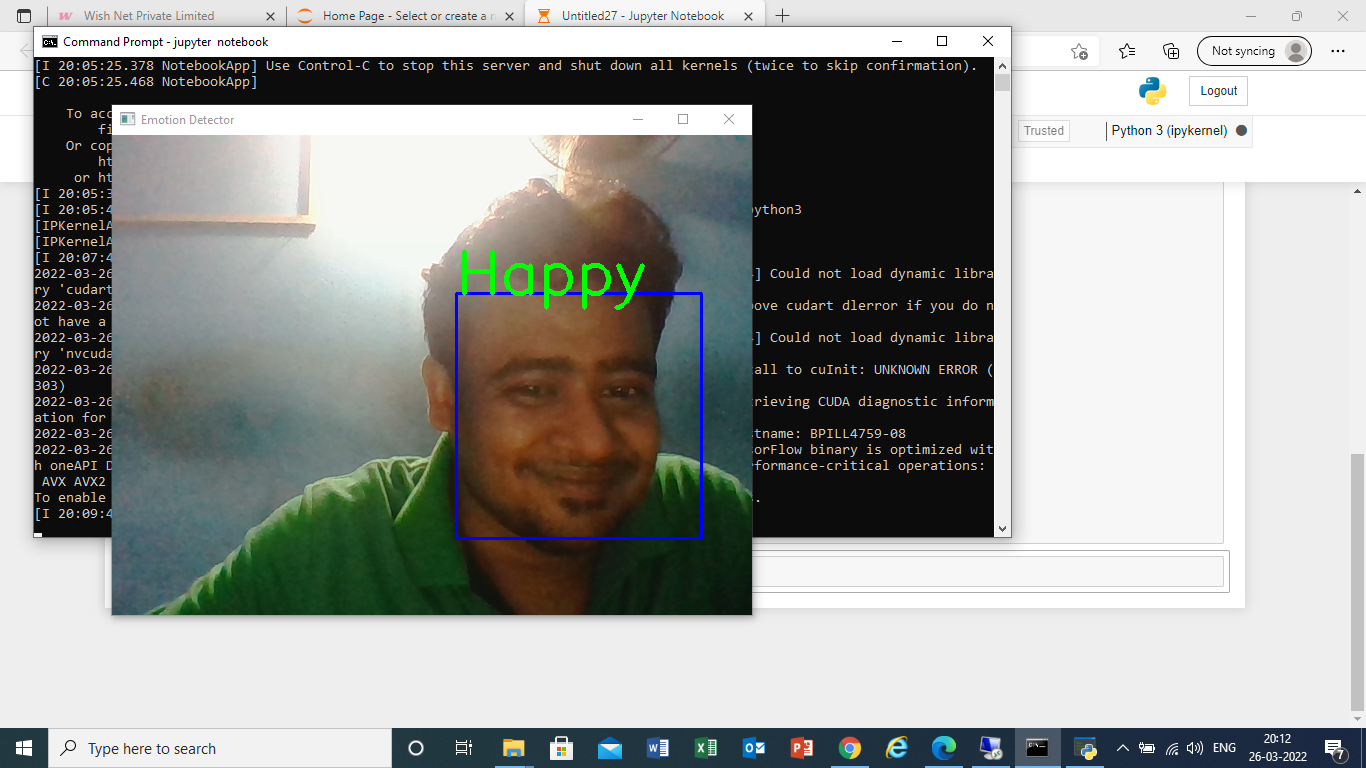